In [81]:
import numpy as np
import pandas as pd
import os
import math
import matplotlib.pyplot as plt
import random
import pickle as pk
import warnings
import plotly.express as px
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import GradientBoostingRegressor, HistGradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from sklearn import datasets, metrics, model_selection, svm
from sklearn.inspection import permutation_importance
from sklearn.linear_model import LinearRegression

In [82]:
warnings.simplefilter('ignore', FutureWarning)

In [83]:
df = pd.read_csv(r'diamonds.csv')
print(df)

       Unnamed: 0  carat        cut color clarity  depth  table  price     x  \
0               1   0.23      Ideal     E     SI2   61.5   55.0    326  3.95   
1               2   0.21    Premium     E     SI1   59.8   61.0    326  3.89   
2               3   0.23       Good     E     VS1   56.9   65.0    327  4.05   
3               4   0.29    Premium     I     VS2   62.4   58.0    334  4.20   
4               5   0.31       Good     J     SI2   63.3   58.0    335  4.34   
...           ...    ...        ...   ...     ...    ...    ...    ...   ...   
53935       53936   0.72      Ideal     D     SI1   60.8   57.0   2757  5.75   
53936       53937   0.72       Good     D     SI1   63.1   55.0   2757  5.69   
53937       53938   0.70  Very Good     D     SI1   62.8   60.0   2757  5.66   
53938       53939   0.86    Premium     H     SI2   61.0   58.0   2757  6.15   
53939       53940   0.75      Ideal     D     SI2   62.2   55.0   2757  5.83   

          y     z  
0      3.98  2.43  

In [84]:
# df = pd.read_csv(r'C:\Users\stany\OneDrive\Desktop\Air Quality\AirQualityUCI.csv')
# print(df)
print(df.head())

   Unnamed: 0  carat      cut color clarity  depth  table  price     x     y  \
0           1   0.23    Ideal     E     SI2   61.5   55.0    326  3.95  3.98   
1           2   0.21  Premium     E     SI1   59.8   61.0    326  3.89  3.84   
2           3   0.23     Good     E     VS1   56.9   65.0    327  4.05  4.07   
3           4   0.29  Premium     I     VS2   62.4   58.0    334  4.20  4.23   
4           5   0.31     Good     J     SI2   63.3   58.0    335  4.34  4.35   

      z  
0  2.43  
1  2.31  
2  2.31  
3  2.63  
4  2.75  


In [85]:
df.dtypes

Unnamed: 0      int64
carat         float64
cut            object
color          object
clarity        object
depth         float64
table         float64
price           int64
x             float64
y             float64
z             float64
dtype: object

In [86]:
#Check if there are any NAN values in the dataset

df.isnull().values.any()

False

In [87]:
cut = df['cut']

In [88]:
#one hot encode the columns that need to be changed
# 0=Ideal, 1=Premium, 2=Good, 3=Very Good, 4=fair
df['cut'] = pd.factorize(df['cut'])[0]
df['cut']

0        0
1        1
2        2
3        1
4        2
        ..
53935    0
53936    2
53937    3
53938    1
53939    0
Name: cut, Length: 53940, dtype: int64

In [89]:
color = df['color']

In [90]:
# E=0, I=1, J=2, H=3, F=4, G=5, D=6 
df['color'] = pd.factorize(df['color'])[0]
df['color']

0        0
1        0
2        0
3        1
4        2
        ..
53935    6
53936    6
53937    6
53938    3
53939    6
Name: color, Length: 53940, dtype: int64

In [91]:
clarity = df['clarity']

In [92]:
# SI2=0, SI1=1, VS1=2, VS2=3, VVS2=4, VVS1=5, I1=6, IF=7
df['clarity'] = pd.factorize(df['clarity'])[0]
df['clarity']

0        0
1        1
2        2
3        3
4        0
        ..
53935    1
53936    1
53937    1
53938    0
53939    0
Name: clarity, Length: 53940, dtype: int64

In [93]:
df.pop(df.columns[0])
df

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,0,0,0,61.5,55.0,326,3.95,3.98,2.43
1,0.21,1,0,1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,2,0,2,56.9,65.0,327,4.05,4.07,2.31
3,0.29,1,1,3,62.4,58.0,334,4.20,4.23,2.63
4,0.31,2,2,0,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,0,6,1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,2,6,1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,3,6,1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,1,3,0,61.0,58.0,2757,6.15,6.12,3.74


In [94]:
corr = df.corr()
corr.style.background_gradient(cmap='BrBG_r')

,carat,cut,color,clarity,depth,table,price,x,y,z
carat,1.000000,0.114426,-0.065386,-0.281218,0.028224,0.181618,0.921591,0.975094,0.951722,0.953387
cut,0.114426,1.000000,-0.029128,-0.118670,0.169916,0.381988,0.049421,0.105361,0.105319,0.126726
color,-0.065386,-0.029128,1.000000,0.032589,-0.001665,-0.033998,-0.016560,-0.055268,-0.054762,-0.055684
clarity,-0.281218,-0.118670,0.032589,1.000000,-0.025877,-0.133692,-0.140270,-0.305918,-0.297037,-0.299969
depth,0.028224,0.169916,-0.001665,-0.025877,1.000000,-0.295779,-0.010647,-0.025289,-0.029341,0.094924
table,0.181618,0.381988,-0.033998,-0.133692,-0.295779,1.000000,0.127134,0.195344,0.183760,0.150929
price,0.921591,0.049421,-0.016560,-0.140270,-0.010647,0.127134,1.000000,0.884435,0.865421,0.861249
x,0.975094,0.105361,-0.055268,-0.305918,-0.025289,0.195344,0.884435,1.000000,0.974701,0.970772
y,0.951722,0.105319,-0.054762,-0.297037,-0.029341,0.183760,0.865421,0.974701,1.000000,0.952006
z,0.953387,0.126726,-0.055684,-0.299969,0.094924,0.150929,0.861249,0.970772,0.952006,1.000000


In [95]:
y = df['price']
col = 'price'
X = df.loc[:, df.columns != col]

rem_X, test_X, rem_y, test_y = train_test_split(X,y, test_size=0.1, random_state=42, shuffle=True)
train_X, valid_X, train_y, valid_y = train_test_split(rem_X, rem_y, test_size=0.2)

In [50]:
# y_train = train['price']
# X_train = train.drop('price', inplace=True, axis=1)
# y_valid = valid['price']
# X_valid = valid.drop('price', inplace=True, axis=1)
# y_test = test['price']
# X_test = test.drop('price', inplace=True, axis=1)
# model.score(valid_X, valid_y)

In [57]:
reg = LinearRegression().fit(X, y)
Rmse = mean_squared_error(test_y, reg.predict(test_X), squared = False)
Rmse

1055.6179664024776

In [58]:
n = 10
compiled_models = []


fit_intercepts = [True, False]
copy_Xs = [True, False]
n_jobss = [None, 1, 5]
positives = [True, False]

counter = 0

for fit_intercept in fit_intercepts:
    for copy_X in copy_Xs:
        for n_jobs in n_jobss:
            for positive in positives:
                        
                print(f"Compiled Model: {counter}\n")

                try:
                    model = LinearRegression(fit_intercept=fit_intercept, 
                                             copy_X = copy_X, 
                                             n_jobs = n_jobs, 
                                             positive = positive).fit(train_X, train_y)
                except:
                    counter += 1
                    continue

                compiled_models.append([float(model.score(valid_X, valid_y)), model])
                counter += 1

                        
compiled_models.sort(key=lambda row: (row[0]))
compiled_models = compiled_models[::-1]
# compiled_models = compiled_models[0:n]

for i, model in enumerate(compiled_models):
    print(model[0], model[1])
#     filename = f'PIKLE/GradientBoostingRegressor_{i}'
#     pk.dump(model[1], open(filename, 'wb'))

Compiled Model: 0

Compiled Model: 1

Compiled Model: 2

Compiled Model: 3

Compiled Model: 4

Compiled Model: 5

Compiled Model: 6

Compiled Model: 7

Compiled Model: 8

Compiled Model: 9

Compiled Model: 10

Compiled Model: 11

Compiled Model: 12

Compiled Model: 13

Compiled Model: 14

Compiled Model: 15

Compiled Model: 16

Compiled Model: 17

Compiled Model: 18

Compiled Model: 19

Compiled Model: 20

Compiled Model: 21

Compiled Model: 22

Compiled Model: 23

0.8518935428172454 LinearRegression(copy_X=False, n_jobs=5, positive=True)
0.8518935428172454 LinearRegression(copy_X=False, n_jobs=1, positive=True)
0.8518935428172454 LinearRegression(copy_X=False, positive=True)
0.8518935428172454 LinearRegression(n_jobs=5, positive=True)
0.8518935428172454 LinearRegression(n_jobs=1, positive=True)
0.8518935428172454 LinearRegression(positive=True)
0.8406088151472255 LinearRegression(copy_X=False, n_jobs=5)
0.8406088151472255 LinearRegression(copy_X=False, n_jobs=1)
0.8406088151472255 Lin

In [62]:
compiled_models[0][1]

LinearRegression(copy_X=False, n_jobs=5, positive=True)

In [64]:
reg = LinearRegression(copy_X=False, n_jobs=5, positive=True).fit(X,y)
Rmse = mean_squared_error(test_y, reg.predict(test_X), squared = False)
Rmse

1069.4186715644794

In [ ]:
n = 20
compiled_models = []


losss = ['squared_error', 'absolute_error', 'huber', 'quantile']
learning_rates = [0.1, 0.2, 0.3, 0.5]
n_estimatorss = [100, 200, 300, 400]
subsamples = [0.01, 0.5, 0.99]
criterions = ['friedman_mse', 'squared_error']
max_depths = [3, 5, 7]
max_featuress = ['auto', 'sqrt', 'log2']
warm_starts = [True, False]

counter = 0

for loss in losss:
    for learning_rate in learning_rates:
        for n_estimators in n_estimatorss:
            for subsample in subsamples:
                for criterion in criterions:
                    for max_depth in max_depths:
                        for max_features in max_featuress:
                            for warm_start in warm_starts:
                        
                                print(f"Compiled Model: {counter}\n")

                                try:
                                    model = GradientBoostingRegressor(loss=loss, 
                                                               learning_rate = learning_rate, 
                                                               n_estimators = n_estimators, 
                                                               subsample = subsample, 
                                                               criterion = criterion, 
                                                               max_depth = max_depth, 
                                                               max_features = max_features, 
                                                               warm_start = warm_start).fit(train_X, train_y)
                                except:
                                    counter += 1
                                    continue

                                compiled_models.append([float(model.score(valid_X, valid_y)), model])
                                counter += 1
                        
                        
compiled_models.sort(key=lambda row: (row[0]))
compiled_models = compiled_models[::-1]
# compiled_models = compiled_models[0:n]

for i, model in enumerate(compiled_models):
    print(model[0], model[1])
#     filename = f'PIKLE/GradientBoostingRegressor_{i}'
#     pk.dump(model[1], open(filename, 'wb'))

In [16]:
model = GradientBoostingRegressor().fit(train_X, train_y)
Rmse = mean_squared_error(test_y, model.predict(test_X), squared = False)
Rmse

740.8674266215188

In [ ]:
n = 20
compiled_models = []


losss = ['squared_error', 'absolute_error', 'huber', 'quantile']
learning_rates = [0.1, 0.2, 0.3, 0.5]
n_estimatorss = [100, 200, 300, 400]
subsamples = [0.01, 0.5, 0.99]
criterions = ['friedman_mse', 'squared_error']
max_depths = [3, 5, 7]
max_featuress = ['auto', 'sqrt', 'log2']
warm_starts = [True, False]

counter = 0

for loss in losss:
    for learning_rate in learning_rates:
        for n_estimators in n_estimatorss:
            for subsample in subsamples:
                for criterion in criterions:
                    for max_depth in max_depths:
                        for max_features in max_featuress:
                            for warm_start in warm_starts:
                        
                                print(f"Compiled Model: {counter}\n")

                                try:
                                    model = GradientBoostingRegressor(loss=loss, 
                                                               learning_rate = learning_rate, 
                                                               n_estimators = n_estimators, 
                                                               subsample = subsample, 
                                                               criterion = criterion, 
                                                               max_depth = max_depth, 
                                                               max_features = max_features, 
                                                               warm_start = warm_start).fit(train_X, train_y)
                                except:
                                    counter += 1
                                    continue

                                compiled_models.append([float(model.score(valid_X, valid_y)), model])
                                counter += 1
                        
                        
compiled_models.sort(key=lambda row: (row[0]))
compiled_models = compiled_models[::-1]
compiled_models = compiled_models[0:n]

for i, model in enumerate(compiled_models):
    print(model[0], model[1])
    filename = f'PIKLE/GradientBoostingRegressor_{i}'
    pk.dump(model[1], open(filename, 'wb'))

In [17]:
modelS = []
for i in range(20):
    file = open(f'PIKLE\GradientBoostingRegressor_{i}', 'rb')
    modelS.append(pk.load(file))
    file.close()

In [18]:
Rmse = mean_squared_error(test_y, modelS[0].predict(test_X), squared = False)
Rmse

555.5800559879348

In [19]:
y_pred = modelS[0].predict(test_X)

root_mean_sq_err = 0

for i, pred in enumerate(y_pred):
    root_mean_sq_err += (pred - test_y.iloc[i])**2

root_mean_sq_err = root_mean_sq_err/len(y_pred)
root_mean_sq_err = math.sqrt(root_mean_sq_err)

root_mean_sq_err

555.5800559879344

In [20]:
cross_val_score(modelS[0], valid_X, valid_y, cv=10)

array([0.97740869, 0.97679585, 0.97417235, 0.98164669, 0.97077882,
       0.97855974, 0.97811571, 0.97004121, 0.97145283, 0.97450381])

In [21]:
for i in range(10):
    print(i,"th model =", modelS[i].feature_importances_)

0 th model = [0.52631521 0.00164308 0.0224257  0.05155008 0.00147378 0.00068319
 0.00410459 0.35715881 0.03464556]
1 th model = [0.56408544 0.00178605 0.02252475 0.05139472 0.00138855 0.00057771
 0.00371504 0.32514703 0.02938071]
2 th model = [0.41477778 0.00168198 0.03310434 0.06368945 0.00200356 0.00113687
 0.00273158 0.4695376  0.01133684]
3 th model = [0.53599302 0.0016194  0.02245943 0.05138201 0.00150972 0.00069671
 0.00358683 0.35013313 0.03261976]
4 th model = [0.40825825 0.00162869 0.03306655 0.06316503 0.00196363 0.00108058
 0.00255839 0.47163676 0.01664212]
5 th model = [0.56005959 0.00172093 0.02234303 0.05120574 0.00153968 0.0007182
 0.00314903 0.32509888 0.03416492]
6 th model = [0.39766745 0.00168829 0.0333309  0.06368716 0.002347   0.00128595
 0.00315365 0.48493086 0.01190875]
7 th model = [0.53469879 0.00175315 0.02243266 0.05140108 0.00129541 0.00059642
 0.00418994 0.34291042 0.04072213]
8 th model = [0.55291033 0.00158692 0.02237061 0.05124421 0.00145415 0.00059431
 

In [22]:
corr = df.corr()
corr.style.background_gradient(cmap='BrBG_r')

,carat,cut,color,clarity,depth,table,price,x,y,z
carat,1.000000,0.114426,-0.065386,-0.281218,0.028224,0.181618,0.921591,0.975094,0.951722,0.953387
cut,0.114426,1.000000,-0.029128,-0.118670,0.169916,0.381988,0.049421,0.105361,0.105319,0.126726
color,-0.065386,-0.029128,1.000000,0.032589,-0.001665,-0.033998,-0.016560,-0.055268,-0.054762,-0.055684
clarity,-0.281218,-0.118670,0.032589,1.000000,-0.025877,-0.133692,-0.140270,-0.305918,-0.297037,-0.299969
depth,0.028224,0.169916,-0.001665,-0.025877,1.000000,-0.295779,-0.010647,-0.025289,-0.029341,0.094924
table,0.181618,0.381988,-0.033998,-0.133692,-0.295779,1.000000,0.127134,0.195344,0.183760,0.150929
price,0.921591,0.049421,-0.016560,-0.140270,-0.010647,0.127134,1.000000,0.884435,0.865421,0.861249
x,0.975094,0.105361,-0.055268,-0.305918,-0.025289,0.195344,0.884435,1.000000,0.974701,0.970772
y,0.951722,0.105319,-0.054762,-0.297037,-0.029341,0.183760,0.865421,0.974701,1.000000,0.952006
z,0.953387,0.126726,-0.055684,-0.299969,0.094924,0.150929,0.861249,0.970772,0.952006,1.000000


In [23]:
Rmse = mean_squared_error(test_y, modelS[0].predict(test_X), squared = False)
Rmse

555.5800559879348

In [24]:
modelS[0].get_params

<bound method BaseEstimator.get_params of GradientBoostingRegressor(loss='huber', max_depth=7, max_features='auto',
                          n_estimators=300, subsample=0.99, warm_start=True)>

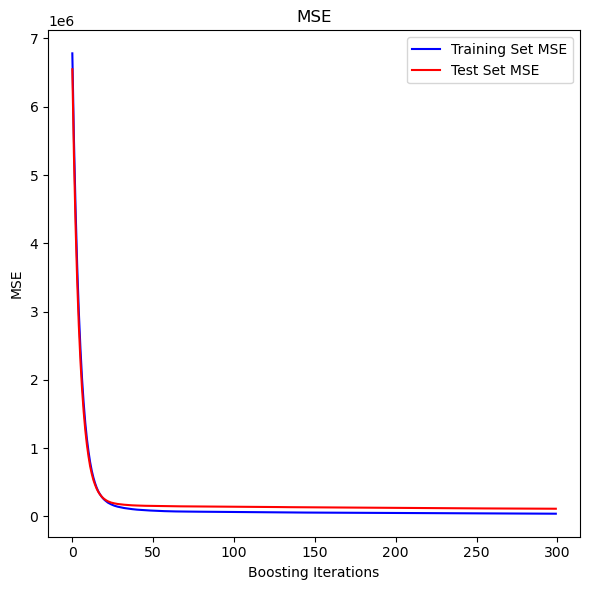

In [74]:
params={"loss":'huber', 
        "max_depth": 7, 
        "max_features":'auto',
        "n_estimators": 300,
        "subsample" : 0.99, 
        "warm_start" : True}
test_score = np.zeros((params["n_estimators"],), dtype=np.float64)
for i, pred_y in enumerate(modelS[0].staged_predict(valid_X)):
#     modelS[0].score(test_y, pred_y)
#     print(valid_y)
#     print(pred_y)
    test_score[i] = mean_squared_error(valid_y, pred_y)
fig = plt.figure(figsize=(6, 6))
plt.subplot(1, 1, 1)
plt.title("MSE")
train_score = modelS[0].train_score_
plt.plot(
    np.arange(params["n_estimators"]),
    train_score[::],
    "b-",
    label="Training Set MSE",
)
plt.plot(
    np.arange(params["n_estimators"] ), test_score[::], "r-", label="Test Set MSE"
)
plt.legend(loc="upper right")
plt.xlabel("Boosting Iterations")
plt.ylabel("MSE")
fig.tight_layout()
fig1 = plt.gcf()
plt.show()
fig1.savefig('GradientBoostingRegressorMSE.png')

In [28]:
#Comparing the values between the predicted and the true value
for i in range(valid_y.shape[0]):
    print(valid_y.iloc[i], pred_y[i])

706 863.2958306144294
1802 1862.689777854973
1764 1569.1306083017068
9624 8657.964088709787
3595 3545.0927263862286
6914 7357.329777954611
12833 12721.577206539801
1664 1722.5467616133087
721 692.5878017635664
737 768.9441215305079
1358 1328.7052235407577
4547 4503.95539755762
1197 1223.7161406117398
3139 3425.445184061535
9120 11169.915642090864
680 690.7186511221357
863 833.8516832359905
1090 1187.031047317135
1421 1210.7486631601193
4997 5157.367841627999
891 889.4069694757444
810 735.631892777182
1343 1490.5762096598583
3167 2874.4949644954313
9808 9953.740568773856
3265 3493.46711915594
3402 3462.7779166075748
990 930.7657969291604
2593 2813.6139662362525
864 872.4209548864756
2387 2185.7569522062627
4844 4826.49471789323
620 581.4955896181715
2197 2213.6569977458003
773 809.5027960652844
14931 14959.784304196102
8674 8653.992013760253
1244 1193.3907303814203
7321 7439.911622766019
4808 4655.173813993665
2059 2018.5083658330464
5134 4774.0149248181815
799 734.4583621586269
6302 66

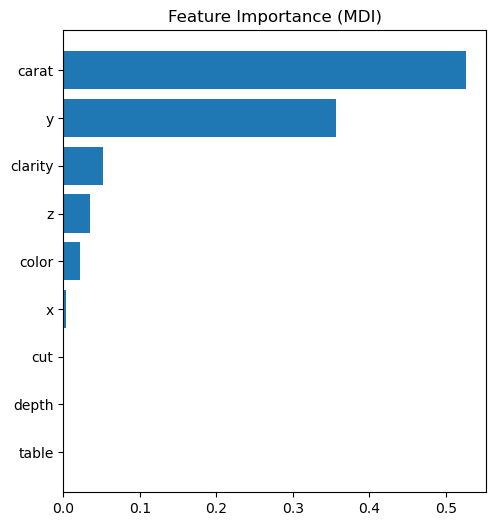

In [31]:
feature_importance = modelS[0].feature_importances_
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + 0.5
fig = plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.barh(pos, feature_importance[sorted_idx], align="center")
plt.yticks(pos, np.array(X.columns)[sorted_idx])
plt.title("Feature Importance (MDI)")

result = permutation_importance(
    modelS[0], test_X, test_y, n_repeats=10, random_state=42, n_jobs=2
)

In [32]:
#Base model of the Histogram Gradient Boosting
modelH = HistGradientBoostingRegressor().fit(train_X, train_y)
Rmse = mean_squared_error(test_y, modelH.predict(test_X), squared = False)
Rmse

576.7155229292139

In [33]:
#Created a model using Histogram Gradient Boosting as dataset was greater than 10K
n = 10
compiled_models = []


losss = ['squared_error', 'absolute_error', 'poisson', 'quantile']
learning_rates = [0.1, 0.2, 0.3, 0.5]
max_depths = [3, 5, 7]
warm_starts = [True, False]


counter = 0

for loss in losss:
    for learning_rate in learning_rates:
        for max_depth in max_depths:
            for warm_start in warm_starts:

                print(f"Compiled Model: {counter}\n")

                try:
                    model = HistGradientBoostingRegressor(loss=loss,
                                                          learning_rate = learning_rate, 
                                                          max_depth = max_depth, 
                                                          warm_start = warm_start).fit(train_X, train_y)
                except:
                    counter += 1
                    continue

                compiled_models.append([float(mean_squared_error(test_y, model.predict(test_X), squared = False)), model])
                counter += 1

                        
compiled_models.sort(key=lambda row: (row[0]))
compiled_models = compiled_models[::-1]
compiled_models = compiled_models[0:n]

for i, model in enumerate(compiled_models):
    print(model[0], model[1])
#     filename = f'HistPIKLE/HistGradientBoostingRegressor_{i}'
#     pk.dump(model[1], open(filename, 'wb'))

Compiled Model: 0

Compiled Model: 1

Compiled Model: 2

Compiled Model: 3

Compiled Model: 4

Compiled Model: 5

Compiled Model: 6

Compiled Model: 7

Compiled Model: 8

Compiled Model: 9

Compiled Model: 10

Compiled Model: 11

Compiled Model: 12

Compiled Model: 13

Compiled Model: 14

Compiled Model: 15

Compiled Model: 16

Compiled Model: 17

Compiled Model: 18

Compiled Model: 19

Compiled Model: 20

Compiled Model: 21

Compiled Model: 22

Compiled Model: 23

Compiled Model: 24

Compiled Model: 25

Compiled Model: 26

Compiled Model: 27

Compiled Model: 28

Compiled Model: 29

Compiled Model: 30

Compiled Model: 31

Compiled Model: 32

Compiled Model: 33

Compiled Model: 34

Compiled Model: 35

Compiled Model: 36

Compiled Model: 37

Compiled Model: 38

Compiled Model: 39

Compiled Model: 40

Compiled Model: 41

Compiled Model: 42

Compiled Model: 43

Compiled Model: 44

Compiled Model: 45

Compiled Model: 46

Compiled Model: 47

Compiled Model: 48

Compiled Model: 49

Compiled M

In [77]:
col = 'price'
col1 = 'depth'
col2 = 'table'
col3 = 'price'
new_df = df.loc[:, df.columns != (col and col1 and col2)]
y = new_df['price']
X = df.loc[:, df.columns != col]

In [78]:
rem_X, test_X, rem_y, test_y = train_test_split(X,y, test_size=0.1, random_state=42, shuffle=True)
train_X, valid_X, train_y, valid_y = train_test_split(rem_X, rem_y, test_size=0.2)

In [79]:
model = GradientBoostingRegressor(loss='huber', max_depth=7, max_features='auto',
                          n_estimators=300, subsample=0.99, warm_start=True).fit(train_X, train_y)
model.score(valid_X, valid_y)

C:\Users\stany\anaconda3\envs\Proj\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\stany\anaconda3\envs\Proj\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\stany\anaconda3\envs\Proj\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\stany\anaconda3\envs\Proj\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=

C:\Users\stany\anaconda3\envs\Proj\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\stany\anaconda3\envs\Proj\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\stany\anaconda3\envs\Proj\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\stany\anaconda3\envs\Proj\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=

C:\Users\stany\anaconda3\envs\Proj\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\stany\anaconda3\envs\Proj\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\stany\anaconda3\envs\Proj\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\stany\anaconda3\envs\Proj\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=

C:\Users\stany\anaconda3\envs\Proj\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\stany\anaconda3\envs\Proj\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\stany\anaconda3\envs\Proj\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\stany\anaconda3\envs\Proj\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=

C:\Users\stany\anaconda3\envs\Proj\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\stany\anaconda3\envs\Proj\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\stany\anaconda3\envs\Proj\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\stany\anaconda3\envs\Proj\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=

C:\Users\stany\anaconda3\envs\Proj\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\stany\anaconda3\envs\Proj\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\stany\anaconda3\envs\Proj\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\stany\anaconda3\envs\Proj\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=

C:\Users\stany\anaconda3\envs\Proj\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\stany\anaconda3\envs\Proj\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\stany\anaconda3\envs\Proj\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\stany\anaconda3\envs\Proj\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=

C:\Users\stany\anaconda3\envs\Proj\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\stany\anaconda3\envs\Proj\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\stany\anaconda3\envs\Proj\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\stany\anaconda3\envs\Proj\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=

C:\Users\stany\anaconda3\envs\Proj\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\stany\anaconda3\envs\Proj\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\stany\anaconda3\envs\Proj\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\stany\anaconda3\envs\Proj\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=

0.9816417987596615

In [80]:
model.feature_importances_

array([0.54953576, 0.00162027, 0.02231971, 0.05063761, 0.00149   ,
       0.00066699, 0.00344771, 0.34820129, 0.02208068])

# Gaussian Distribution applied

In [34]:
df.describe()

,carat,cut,color,clarity,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,1.228940,3.174416,2.256136,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.265976,2.050156,1.766539,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,0.000000,0.000000,0.000000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,0.000000,1.000000,1.000000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,1.000000,4.000000,2.000000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,3.000000,5.000000,3.000000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,4.000000,6.000000,7.000000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [96]:
fig = px.histogram(df, x='price')
fig.show()

In [97]:
def remove_outlier(df_in, col_name):
    q1 = df_in[col_name].quantile(0.25)
    q3 = df_in[col_name].quantile(0.75)
    iqr = q3-q1 #Interquartile range
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    df_out = df_in.loc[(df_in[col_name] >= fence_low) & (df_in[col_name] <= fence_high)]
    return df_out

In [98]:
df = remove_outlier(df, 'price')

In [99]:
fig = px.histogram(df, x='price')

fig.show()

In [40]:
model = GradientBoostingRegressor(loss='huber', max_depth=7, max_features='auto',
                          n_estimators=300, subsample=0.99, warm_start=True).fit(train_X, train_y)
Rmse = mean_squared_error(test_y, model.predict(test_X), squared = False)
Rmse

551.1490749669267

In [41]:
n = 20
compiled_models = []


losss = ['squared_error', 'absolute_error', 'huber', 'quantile']
n_estimatorss = [400, 500]
subsamples = [0.01, 0.99]
criterions = ['friedman_mse', 'squared_error']
max_depths = [15]
max_featuress = ['auto', 'sqrt', 'log2']
counter = 0

for loss in losss:
    for n_estimators in n_estimatorss:
        for subsample in subsamples:
            for criterion in criterions:
                for max_depth in max_depths:
                    for max_features in max_featuress:

                            print(f"Compiled Model: {counter}\n")

                            try:
                                model = GradientBoostingRegressor(loss=loss, 
                                                           n_estimators = n_estimators, 
                                                           subsample = subsample, 
                                                           criterion = criterion, 
                                                           max_depth = max_depth, 
                                                           max_features = max_features).fit(train_X, train_y)
                            except:
                                counter += 1
                                continue

                            compiled_models.append([float(mean_squared_error(valid_y, model.predict(valid_X), squared = False)), model])
                            counter += 1
                        
                        
compiled_models.sort(key=lambda row: (row[0]))
compiled_models = compiled_models[::-1]
compiled_models = compiled_models[0:n]

for i, model in enumerate(compiled_models):
    print(model[0], model[1])
    filename = f'GPIKLE/GBR_{i}'
    pk.dump(model[1], open(filename, 'wb'))

Compiled Model: 0

Compiled Model: 1

Compiled Model: 2

Compiled Model: 3

Compiled Model: 4

Compiled Model: 5

Compiled Model: 6

Compiled Model: 7

Compiled Model: 8

Compiled Model: 9

Compiled Model: 10

Compiled Model: 11

Compiled Model: 12

Compiled Model: 13

Compiled Model: 14

Compiled Model: 15

Compiled Model: 16

Compiled Model: 17

Compiled Model: 18

Compiled Model: 19

Compiled Model: 20

Compiled Model: 21

Compiled Model: 22

Compiled Model: 23

Compiled Model: 24

Compiled Model: 25

Compiled Model: 26

Compiled Model: 27

Compiled Model: 28

Compiled Model: 29

Compiled Model: 30

Compiled Model: 31

Compiled Model: 32

Compiled Model: 33

Compiled Model: 34

Compiled Model: 35

Compiled Model: 36

Compiled Model: 37

Compiled Model: 38

Compiled Model: 39

Compiled Model: 40

Compiled Model: 41

Compiled Model: 42

Compiled Model: 43

Compiled Model: 44

Compiled Model: 45

Compiled Model: 46

Compiled Model: 47

Compiled Model: 48

Compiled Model: 49

Compiled M

In [42]:
compiled_models

[[1317.7627371542937,
  GradientBoostingRegressor(loss='huber', max_depth=15, max_features='log2',
                            n_estimators=500, subsample=0.01)],
 [1313.7170019956156,
  GradientBoostingRegressor(criterion='squared_error', max_depth=15,
                            max_features='log2', n_estimators=500,
                            subsample=0.01)],
 [1313.2234355094026,
  GradientBoostingRegressor(criterion='squared_error', loss='quantile',
                            max_depth=15, max_features='sqrt', n_estimators=500,
                            subsample=0.01)],
 [1308.126766823462,
  GradientBoostingRegressor(loss='huber', max_depth=15, max_features='sqrt',
                            n_estimators=500, subsample=0.01)],
 [1305.8005730182297,
  GradientBoostingRegressor(max_depth=15, max_features='sqrt', n_estimators=500,
                            subsample=0.01)],
 [1304.857616269535,
  GradientBoostingRegressor(criterion='squared_error', loss='quantile',
        

In [54]:
model = GradientBoostingRegressor(learning_rate=0.3, loss='huber', max_features='auto',
                          subsample=0.99, warm_start=True, max_depth = 15, n_estimators = 600)
model.fit(X,y)
mean_squared_error(valid_y, model.predict(valid_X), squared = False)

9.278734480712105

In [64]:
scores = []
for i in range(20):
    file = open(f'GPIKLE\GBR_{i}', 'rb')
    temp = pk.load(file)
    scores.append(float(mean_squared_error(valid_y, temp.predict(valid_X), squared = False)))
    file.close()

<>:3: DeprecationWarning:

invalid escape sequence '\G'

<>:3: DeprecationWarning:

invalid escape sequence '\G'

C:\Users\stany\AppData\Local\Temp\ipykernel_19540\2116555256.py:3: DeprecationWarning:

invalid escape sequence '\G'



In [65]:
scores

[429.378492824877,
 430.5960574568159,
 431.425073266127,
 433.0189826894512,
 436.0456953745214,
 436.0855874191974,
 437.4340637452395,
 439.6863458375133,
 440.14300615124927,
 440.28843887876275,
 440.38380981478736,
 440.5480849177478,
 442.6991396395267,
 443.44222407199885,
 444.08133200783385,
 444.66205390339076,
 445.2428208133881,
 445.35762744358055,
 445.5417631263545,
 445.85198355662334]

In [70]:
model = GradientBoostingRegressor(learning_rate=0.3, loss='huber', max_features='auto',
                          subsample=0.99, warm_start=True, max_depth = 15, n_estimators = 600)
model.fit(X,y)
mean_squared_error(valid_y, model.predict(valid_X), squared = False)

12.98450458873304

In [71]:
mean_squared_error(test_y, model.predict(test_X), squared = False)

8.33486223440928

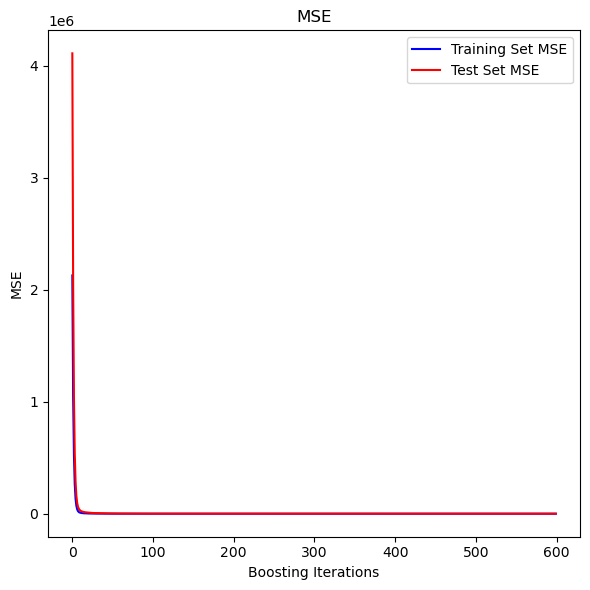

In [81]:
params={"loss":'huber', 
        "max_depth": 15, 
        "max_features":'auto',
        "n_estimators": 600,
        "subsample" : 0.99, 
        "warm_start" : True, 
        "learning_rate" : 0.3}
test_score = np.zeros((params["n_estimators"],), dtype=np.float64)
for i, pred_y in enumerate(model.staged_predict(test_X)):
#     modelS[0].score(test_y, pred_y)
#     print(valid_y)
#     print(pred_y)
    test_score[i] = mean_squared_error(test_y, pred_y)
fig = plt.figure(figsize=(6, 6))
plt.subplot(1, 1, 1)
plt.title("MSE")
train_score = model.train_score_
plt.plot(
    np.arange(params["n_estimators"]),
    train_score[::],
    "b-",
    label="Training Set MSE",
)
plt.plot(
    np.arange(params["n_estimators"]), test_score[::], "r-", label="Test Set MSE"
)
plt.legend(loc="upper right")
plt.xlabel("Boosting Iterations")
plt.ylabel("MSE")
fig.tight_layout()
fig1 = plt.gcf()
plt.show()
fig.savefig('Gaussian_Distribution_MSE.png')

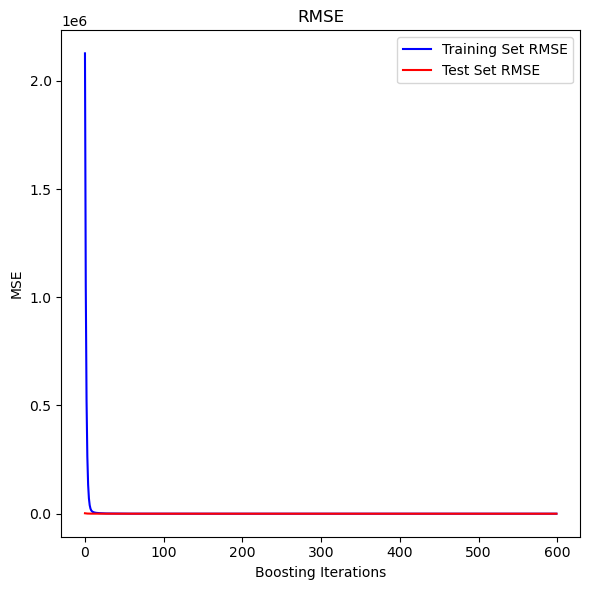

In [80]:
params={"loss":'huber', 
        "max_depth": 15, 
        "max_features":'auto',
        "n_estimators": 600,
        "subsample" : 0.99, 
        "warm_start" : True, 
        "learning_rate" : 0.3}
test_score = np.zeros((params["n_estimators"],), dtype=np.float64)
for i, pred_y in enumerate(model.staged_predict(test_X)):
#     modelS[0].score(test_y, pred_y)
#     print(valid_y)
#     print(pred_y)
    test_score[i] = mean_squared_error(test_y, pred_y, squared = False)
fig = plt.figure(figsize=(6, 6))
plt.subplot(1, 1, 1)
plt.title("RMSE")
train_score = model.train_score_
plt.plot(
    np.arange(params["n_estimators"]),
    train_score[::],
    "b-",
    label="Training Set RMSE",
)
plt.plot(
    np.arange(params["n_estimators"]), test_score[::], "r-", label="Test Set RMSE"
)
plt.legend(loc="upper right")
plt.xlabel("Boosting Iterations")
plt.ylabel("MSE")
fig.tight_layout()
fig1 = plt.gcf()
plt.show()
fig.savefig('Gaussian_Distribution_RMSE.png')